In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
startup=pd.read_csv('startup_funding.csv')

# Assessing Data

In [57]:
startup.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [58]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [59]:
startup.shape

(2372, 10)

In [60]:
#checking for missing values
total = startup.isnull().sum().sort_values(ascending = False)
percent = ((startup.isnull().sum()/startup.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Remarks,1953,82.335582
SubVertical,936,39.460371
AmountInUSD,847,35.708263
CityLocation,179,7.546374
IndustryVertical,171,7.209106
InvestorsName,8,0.337268
InvestmentType,1,0.042159
StartupName,0,0.000000
Date,0,0.000000
SNo,0,0.000000


# Cleaning Data

In [61]:
startup.drop(columns={'SNo','Remarks'},inplace=True)

In [62]:
startup.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000"
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000"
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000"


In [63]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 8 columns):
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
dtypes: object(8)
memory usage: 148.3+ KB


In [64]:
startup["AmountInUSD"]=startup["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
startup["AmountInUSD"]=pd.to_numeric(startup["AmountInUSD"])
startup.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


In [65]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 8 columns):
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null float64
dtypes: float64(1), object(7)
memory usage: 148.3+ KB


In [66]:
startup['SubVertical']=startup['SubVertical'].fillna('Other')

In [67]:
startup['CityLocation']=startup['CityLocation'].fillna('Other')

In [68]:
startup['IndustryVertical']=startup['IndustryVertical'].fillna('Other')

In [69]:
startup['InvestorsName']=startup['InvestorsName'].fillna('Not Specified')
startup['InvestmentType']=startup['InvestmentType'].fillna('Not Known')

In [70]:
total = startup.isnull().sum().sort_values(ascending = False)
percent = ((startup.isnull().sum()/startup.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
AmountInUSD,847,35.708263
InvestmentType,0,0.000000
InvestorsName,0,0.000000
CityLocation,0,0.000000
SubVertical,0,0.000000
IndustryVertical,0,0.000000
StartupName,0,0.000000
Date,0,0.000000


In [71]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 8 columns):
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2372 non-null object
SubVertical         2372 non-null object
CityLocation        2372 non-null object
InvestorsName       2372 non-null object
InvestmentType      2372 non-null object
AmountInUSD         1525 non-null float64
dtypes: float64(1), object(7)
memory usage: 148.3+ KB


In [72]:
startup["Date"]=startup["Date"].apply(lambda x: (str(x).replace(",","")))

In [73]:
startup["Date"]=startup["Date"].apply(lambda x: (str(x).replace("//","/")))
startup["Date"]=startup["Date"].apply(lambda x: (str(x).replace(".","/")))

In [74]:
startup['Date']=pd.to_datetime(startup['Date'])

In [75]:
startup.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN
2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN
3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0
4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0


In [77]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 8 columns):
Date                2372 non-null datetime64[ns]
StartupName         2372 non-null object
IndustryVertical    2372 non-null object
SubVertical         2372 non-null object
CityLocation        2372 non-null object
InvestorsName       2372 non-null object
InvestmentType      2372 non-null object
AmountInUSD         1525 non-null float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 148.3+ KB


In [78]:
startup['year_month']=(startup['Date'].dt.year)*100+(startup['Date'].dt.month)

In [79]:
startup.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,year_month
0,2017-01-08,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,201701
1,2017-02-08,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,201702
2,2017-02-08,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,201702
3,2017-02-08,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,201702
4,2017-02-08,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,201702


In [25]:
startup["IndustryVertical"]=startup["IndustryVertical"].str.lower()
startup["SubVertical"]=startup["SubVertical"].str.lower()
startup["StartupName"]=startup["StartupName"].str.lower()
startup["InvestorsName"]=startup["InvestorsName"].str.lower()
startup["InvestmentType"]=startup["InvestmentType"].str.lower()

In [26]:
import re
unique_IV=startup['IndustryVertical'].unique()
values_IV=np.array(startup['IndustryVertical'].values)
for i in range (len(unique_IV)):
    for j in range (len(values_IV)):
        if re.search(unique_IV[i],values_IV[j]):
            values_IV[j]=unique_IV[i]

In [27]:
startup["IndustryVertical"]=startup["IndustryVertical"].apply(lambda x: str(x).replace("food & beverages","food & beverage"))
startup["IndustryVertical"].unique()

array(['technology', 'consumer internet', 'ecommerce', 'logistics',
       'others', 'healthcare', 'food & beverage', 'finance', 'education',
       'real estate', 'fmcg', 'reality', 'auto', 'bfsi',
       'consumer interne', 'online education information platform',
       'brand licensing startup',
       'gourmet food discovery & delivery platform',
       'transportation & logistics platform',
       'enterprise marketing automation platform',
       'health, wellness & beauty services app', 'digital healthcare',
       'last minute hotel booking app', 'womens fashion wear portal',
       'product learning platform',
       'online food ordering & delivery platform',
       'app based bus pooling services', 'social learning platform',
       'social fitness platform', 'on demand mobile app developer',
       'car maintenance & management mobile app',
       'online wedding marketplace', 'splitting bills mobile app',
       'iot energy management analytics platform',
       'custom m

In [28]:
unique_SV=startup['SubVertical'].unique()
values_SV=np.array(startup['SubVertical'].values)
for i in range (len(unique_SV)):
    for j in range (len(values_SV)):
        if re.search(unique_SV[i],values_SV[j]):
            values_SV[j]=unique_SV[i]

In [29]:
startup['SubVertical'].unique()

array(['predictive care platform', 'digital marketing agency',
       'online platform for higher education services', ...,
       'hobby & activity class aggregator', 'interior design marketplace',
       'other'], dtype=object)

In [30]:
unique_SN=startup['StartupName'].unique()
values_SN=np.array(startup['StartupName'].values)
for i in range (len(unique_SN)):
    for j in range (len(values_SN)):
        if re.search(unique_SN[i],values_SN[j]):
            values_SN[j]=unique_SN[i]

In [31]:
startup['StartupName']=startup["StartupName"].apply(lambda x: (str(x).replace("ola cabs","ola")))
startup['StartupName']=startup["StartupName"].apply(lambda x: (str(x).replace("olacabs","ola")))
startup['StartupName']=startup["StartupName"].apply(lambda x: (str(x).replace("flipkart.com","flipkart")))
startup['StartupName']=startup["StartupName"].apply(lambda x: (str(x).replace("paytm marketplace","paytm")))

In [32]:
startup['StartupName'].unique()

array(['touchkin', 'ethinos', 'leverage edu', ..., 'graphene',
       'simplotel', 'couponmachine.in'], dtype=object)

In [33]:
unique_IN=startup['InvestorsName'].unique()
values_IN=np.array(startup['InvestorsName'].values)
for i in range (len(unique_IN)):
    for j in range (len(values_IN)):
        if re.search(unique_IN[i],values_IN[j]):
            values_IN[j]=unique_IN[i]
startup["InvestorsName"]=startup["InvestorsName"].apply(lambda x: str(x).replace("undisclosed investors","undisclosed investor"))

In [34]:
startup['InvestorsName'].unique()

array(['kae capital', 'triton investment advisors',
       'kashyap deorah, anand sankeshwar, deepak jain, sadashiva nt, arjun mehta, satish kaul, anindya ghose',
       ..., 'karsemven fund', 'exfinity fund, growx ventures.',
       'uk based group of angel investors'], dtype=object)

In [35]:
unique_IT=startup['InvestmentType'].unique()
values_IT=np.array(startup['InvestmentType'].values)
for i in range (len(unique_IT)):
    for j in range (len(values_IT)):
        if re.search(unique_IT[i],values_IT[j]):
            values_IT[j]=unique_IT[i]

In [36]:
startup["InvestmetType"]=startup["InvestmentType"].apply(lambda x: str(x).replace("privateequity","private equity"))
startup['InvestmentType'].unique()

array(['private equity', 'seed funding', 'debt funding', 'not known',
       'seedfunding', 'privateequity', 'crowd funding'], dtype=object)

# Exploratory Data Analysis

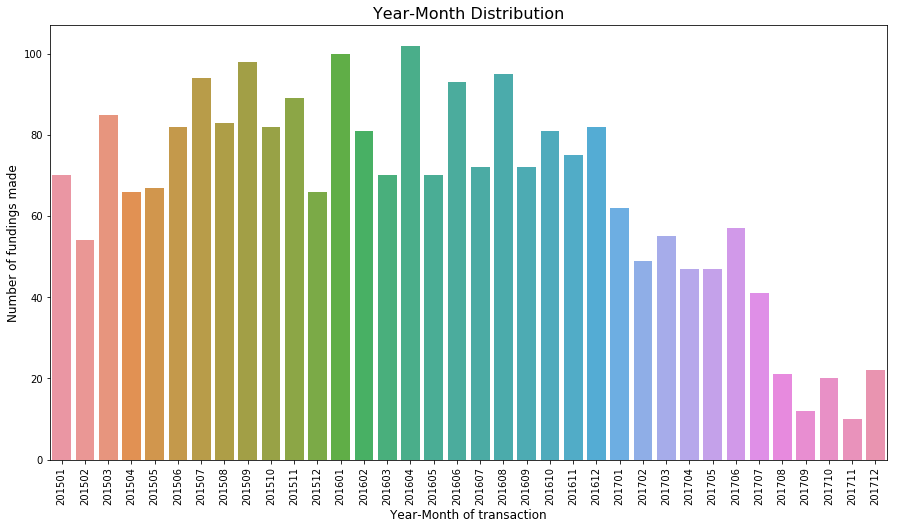

In [37]:
#How the fund is distributed about year and month?
year_month=startup['year_month'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index,year_month.values)
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

In [38]:
#What is the maximum funding that is funded to a startup?
print('Maximum funding that is given to a startup is: ',startup['AmountInUSD'].dropna().sort_values().max())

Maximum funding that is given to a startup is:  1400000000.0


In [39]:
#Which startup has got the maximum funding?
print('Startups having the highest amount of funding:')
startup[startup['AmountInUSD']==1400000000.0].StartupName

Startups having the highest amount of funding:


158       paytm
294    flipkart
Name: StartupName, dtype: object

In [40]:
#What is the minimum funding that has been funded?
print('Minimum funding that is given to a startup is: ',startup['AmountInUSD'].dropna().sort_values().min())

Minimum funding that is given to a startup is:  16000.0


In [41]:
#Which startup/startups have lowest funding?
print('Startups having the lowest amount of funding:')
startup[startup['AmountInUSD']==16000.0].StartupName

Startups having the lowest amount of funding:


2345       hostel dunia
2346    play your sport
2347            yo grad
2348             enabli
2349                cbs
Name: StartupName, dtype: object

In [42]:
#What is the average fund of a startup?
print('Average funding that is given to a startup is: ',startup['AmountInUSD'].dropna().sort_values().mean())

Average funding that is given to a startup is:  12031073.099016393


In [43]:
#What are the number of startups that got funded?
x=len(startup['StartupName'].unique())
print('Number of startups got funded: ',x)

Number of startups got funded:  1917


In [44]:
#What are the top 20 startups according to the number of funds?
startup['StartupName'].value_counts().sort_values(ascending=False).head(20)

ola               9
swiggy            7
urbanclap         6
paytm             6
holachef          5
byju’s            5
medinfi           5
nobroker          5
flipkart          5
jugnoo            5
lenskart          5
cleartax          4
healthifyme       4
yepme             4
lendingkart       4
goqii             4
niki.ai           4
industrybuying    4
moglix            4
mobikwik          4
Name: StartupName, dtype: int64

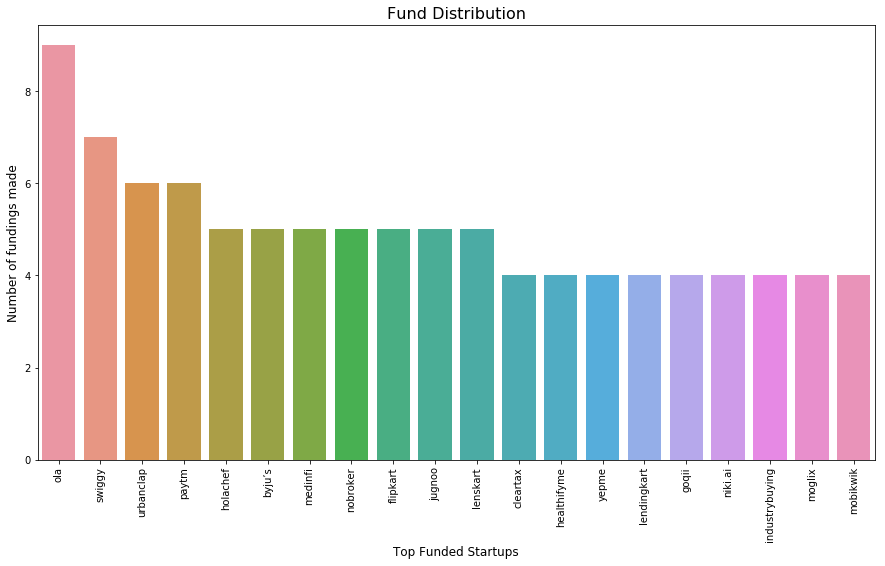

In [45]:
#Graph of the top 20 startups according to the number of funds
fundings=startup['StartupName'].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(15,8))
sns.barplot(fundings.index,fundings.values)
plt.xticks(rotation='vertical')
plt.xlabel('Top Funded Startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Fund Distribution", fontsize=16)
plt.show()

In [46]:
#What kind of startups are more preferred for funding(top 10)?
startup['IndustryVertical'].value_counts().head(10)

consumer internet    772
technology           313
ecommerce            230
other                171
healthcare            31
logistics             24
food & beverage       21
education             20
finance                9
others                 6
Name: IndustryVertical, dtype: int64

In [47]:
#Does City Location play any importance for being funded?
startup['CityLocation'].value_counts().head(10)

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Other        179
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Name: CityLocation, dtype: int64

In [48]:
#What subcategories are preferred for funding?
startup[startup['SubVertical']!='other'].SubVertical.value_counts().head(10)

food delivery platform              9
online pharmacy                     9
online lending platform             9
online learning platform            7
online food delivery platform       4
online payment gateway              4
data analytics platform             4
ecommerce marketplace               4
online test preparation platform    3
healthy food delivery platform      3
Name: SubVertical, dtype: int64

In [49]:
#Who are the top 10 investors?
startup['InvestorsName'].value_counts().head(10)

undisclosed investor        93
indian angel network        25
ratan tata                  24
group of angel investors    20
kalaari capital             16
sequoia capital             14
saif partners               11
brand capital               10
roundglass partners         10
accel partners               9
Name: InvestorsName, dtype: int64

In [50]:
#What are the top 10 startups according to the amount of funds?
top10fund=pd.DataFrame(startup.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False))
top10fund.head(10)

,AmountInUSD
StartupName,
paytm,2.340000e+09
flipkart,2.259700e+09
ola,1.899500e+09
snapdeal,7.000000e+08
oyo rooms,3.750000e+08
quikr,2.300000e+08
delhivery,2.150000e+08
foodpanda,2.100000e+08
shopclues,2.077000e+08


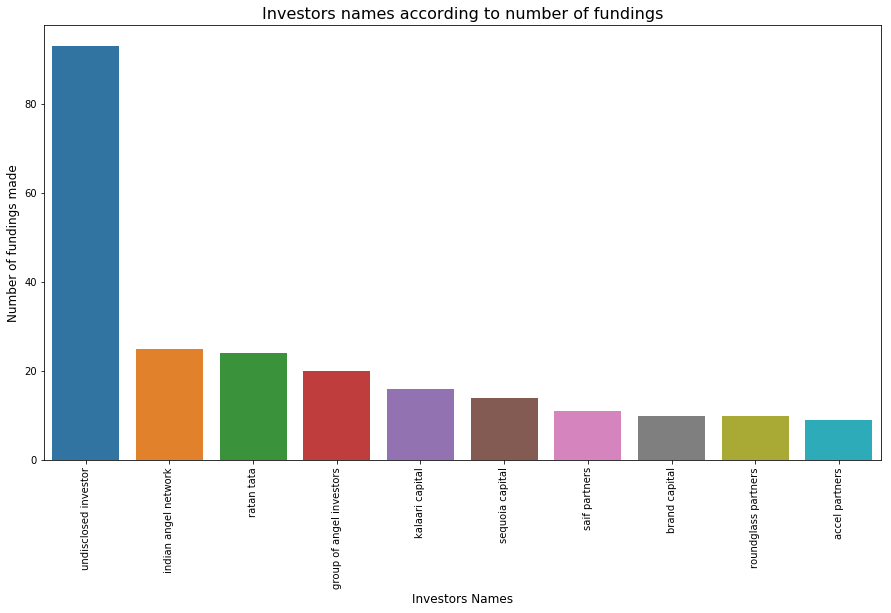

In [51]:
investors=startup['InvestorsName'].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values)
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors names according to number of fundings", fontsize=16)
plt.show()

In [52]:
#What are the types of funding for startups?
startup['InvestmentType'].value_counts()

seed funding      1271
private equity    1066
seedfunding         30
crowd funding        2
privateequity        1
debt funding         1
not known            1
Name: InvestmentType, dtype: int64

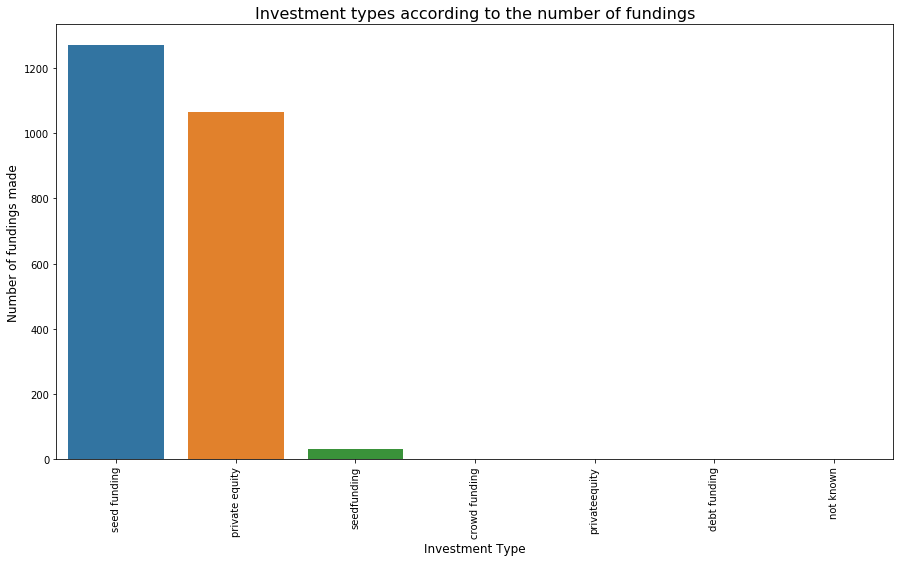

In [53]:
#Graph of number of fundings vs investment type
investment=startup['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values)
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment types according to the number of fundings", fontsize=16)
plt.show()